## Introduction: 
For the final project for Fundamentals of Machine learning we are choosing a data set of our own. So a relevent up to date dataset that we collected somehow. We use this set to try and make predictions based on certain machine learning algorithms.

I choose my own Netflix dataset. What I've expected to get from my own data set was a detailed description and/or categorisation of movies and tv shows. This wasn't the case. Since the data wasn't as detailed as I would have liked the choice was made to use a static kaggle dataset about Netflix. This data set has Descriptions and categorisations etc. about 8000+ Netflix shows and movies. This information will help me training a model for text classification. The research question that is answered in this assignment is: Given Descriptions of shows and movies how well can a model be trained to predict if one of the two profiles (Denise or Rick) in a netflix dataset will watch a certain Tv show/movie?


## Data set: 
The data was aquired through downloading my own dataset from Netflix. After seeing what information was in the Netflix data set I wasn't happy with the information that was in there, because it was quite limited. Therefore I found a Kaggle dataset that had a lot of information about 8000+ tv shows and movies. It has columns about cast members, date added, categories it fits etc. 

#### Data cleaning steps:
The two datasets had to be connected to eachother. Netflix data stored information per episode of a tv show whereas the Kaggle dataset stored the information about the tv show as a whole. Netflix creates new data entries everytime you pause and play a series. (which means a lot of double entries for certain movies/tv shows) 

To correctly connect the Netflixdata to the Kaggle data I made a for loop that iterated over all the netflix rows using the Kaggle Titles. Whenever the Kaggle Title was found in the Netflix Title the for loop would get all the columns connected the Kaggle title and the Netflix tilte and add the rows to a new csv: 'netflix_combined2.csv'. To not have all the double/triple data entries for the same movies and tv shows the loop would stop after finding it once. 

Since Netflix titles look like this; Midnight Mass: Miniserie: Book VII: Revelation (Aflevering 7). To correctly connect the tv show titles to eachother a split (:) statement was used to only use the part before the encountered :. 

In [79]:
import pandas as pd

my_netflix= pd.read_csv('ViewingActivity.csv')  
netflix_kaggle = pd.read_csv("netflix_titles.csv")
df1 = pd.read_csv("Kaggle_combined2.csv")

In [80]:
my_netflix.head(5)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Denise,2022-11-17 19:06:37,00:08:41,NaN,Dead to Me: Seizoen 3: We Didn't Think This Th...,NaN,Google Chromecast V4 Streaming Stick,00:08:41,00:08:41,NL (Netherlands)
1,Denise,2022-11-17 18:39:52,00:26:34,NaN,Dead to Me: Seizoen 3: Where Do We Go Now? (Af...,NaN,Google Chromecast V4 Streaming Stick,00:28:40,00:28:40,NL (Netherlands)
2,Denise,2022-11-17 18:39:23,00:00:16,NaN,Dead to Me: Season 2 - Clip 2,PROMOTIONAL,DefaultWidevineAndroidPhone,00:00:17,00:00:17,NL (Netherlands)
3,Denise,2022-11-17 18:36:51,00:02:02,NaN,Dead to Me: Seizoen 3: Where Do We Go Now? (Af...,NaN,Google Chromecast V4 Streaming Stick,00:02:02,Not latest view,NL (Netherlands)
4,Denise,2022-11-17 18:06:57,00:29:50,NaN,Dead to Me: Seizoen 3: Look at What We Have He...,NaN,Google Chromecast V4 Streaming Stick,00:29:50,00:29:50,NL (Netherlands)


In [81]:
netflix_kaggle.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### Data cleaning code:
To connect the two datasets to eachother I wrote to code in spyder because it takes 30/40 minutes to look over all the data entries. The code doesn't run in Jupiter Notebook so it will give errors. Therefore I added the program in Git:(https://github.com/Keraloth/Exercises_FML/blob/main/netflix.py)

In [1]:
import pandas as pd
from csv import DictWriter

my_netflix= pd.read_csv('ViewingActivity.csv')  
netflix_kaggle = pd.read_csv("netflix_titles.csv")
#netflix_combined = pd.read_csv("Kaggle_combined.csv")

# loop over entries in kaggle title to see if connection is in my_netflix
for i, entry in netflix_kaggle.iterrows():
    title = entry['title']
    show_type = entry['type']
    
    print(title)
    print("---- Start ----")
    
#use boolean found to only add once
    found = False
    for y, my_entry in my_netflix.iterrows():
        
        my_title = my_entry['Title']
        #if a show is found, only use part before :
        if(show_type == "TV Show"):
            my_title = my_title.split(':')[0]
        
      #if found not yet True add data to columns
        if title == my_title and not found:
            #open new csv and add
             f_object = open('Kaggle_combined.csv', 'a', encoding="utf-8")
             print("Title found in my title!" + my_title)
             field_names = ['Profile Name','Start Time', 'Duration', 'Title_N', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country_N', 'Type', 'Title_kg', 'Cast', 'Date Added', 'Release Year', 'Rating', 'Listed In', 'Description']
             row = {'Profile Name': my_entry['Profile Name'],
               'Start Time': my_entry['Start Time'],
               'Duration': my_entry['Duration'],
               'Title_N': my_entry['Title'].replace("’","'"),
               'Device Type': my_entry['Device Type'] ,
               'Bookmark': my_entry['Bookmark'],
               'Latest Bookmark': my_entry['Latest Bookmark'],
               'Country_N': my_entry['Country'],
               'Type':entry['type'],
               'Title_kg': entry['title'],
               'Cast': entry['cast'],
               'Date Added': entry['date_added'],
               'Rating': entry['rating'],
               'Listed In': entry['listed_in'],
               'Description': entry['description'],
               }            
             
             dictwriter_object = DictWriter(f_object, fieldnames=field_names)
             dictwriter_object.writerow(row)
            #close csv
             f_object.close()
             found = True
    print("---- End ----") # to read in the console

Dick Johnson Is Dead
---- Start ----
---- End ----
Blood & Water
---- Start ----
---- End ----
Ganglands
---- Start ----
---- End ----
Jailbirds New Orleans
---- Start ----
---- End ----
Kota Factory
---- Start ----
---- End ----
Midnight Mass
---- Start ----
Title found in my title!Midnight Mass
---- End ----
My Little Pony: A New Generation
---- Start ----
---- End ----
Sankofa
---- Start ----
---- End ----
The Great British Baking Show
---- Start ----
---- End ----
The Starling
---- Start ----
---- End ----
Vendetta: Truth, Lies and The Mafia
---- Start ----
---- End ----
Bangkok Breaking
---- Start ----
---- End ----
Je Suis Karl
---- Start ----
---- End ----
Confessions of an Invisible Girl
---- Start ----
---- End ----
Crime Stories: India Detectives
---- Start ----
---- End ----
Dear White People
---- Start ----
---- End ----
Europe's Most Dangerous Man: Otto Skorzeny in Spain
---- Start ----
---- End ----
Falsa identidad
---- Start ----
---- End ----
Intrusion
---- Start ----


KeyboardInterrupt: 

In [82]:
df1.head(5)

,Profile Name,Start Time,Duration,Title_N,Device Type,Bookmark,Latest Bookmark,Country_N,Type,Title_kg,Cast,Date Added,Release Year,Rating,Listed In,Description
0,Rick,2022-02-19 15:53:36,01:01:55,Midnight Mass: Miniserie: Book VII: Revelation...,Google Chromecast V4 Streaming Stick,01:01:55,01:01:55,NL (Netherlands),TV Show,Midnight Mass,"Kate Siegel, Zach Gilford, Hamish Linklater, H...","September 24, 2021",NaN,TV-MA,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
1,Denise,2021-10-17 09:05:14,00:43:15,Love on the Spectrum: Seizoen 2: Aflevering 6 ...,Google Chromecast V4 Streaming Stick,00:43:15,00:43:15,NL (Netherlands),TV Show,Love on the Spectrum,Brooke Satchwell,"September 21, 2021",NaN,TV-14,"Docuseries, International TV Shows, Reality TV",Finding love can be hard for anyone. For young...
2,Denise,2022-10-13 16:34:07,00:53:21,Sex Education: Seizoen 3: Aflevering 8 (Afleve...,Google Chromecast V4 Streaming Stick,01:00:27,01:00:27,NL (Netherlands),TV Show,Sex Education,"Asa Butterfield, Gillian Anderson, Ncuti Gatwa...","September 17, 2021",NaN,TV-MA,"British TV Shows, International TV Shows, TV C...",Insecure Otis has all the answers when it come...
3,Denise,2022-08-16 16:52:27,00:51:45,Squid Game: Seizoen 1: One Lucky Day (Afleveri...,Google Chromecast V4 Streaming Stick,00:51:45,00:51:45,NL (Netherlands),TV Show,Squid Game,"Lee Jung-jae, Park Hae-soo, Wi Ha-jun, Oh Youn...","September 17, 2021",NaN,TV-MA,"International TV Shows, TV Dramas, TV Thrillers",Hundreds of cash-strapped players accept a str...
4,Rick,2021-07-30 16:31:08,00:00:02,Chappie,Chrome PC (Cadmium),00:00:02,00:00:02,NL (Netherlands),Movie,Chappie,"Sharlto Copley, Hugh Jackman, Sigourney Weaver...","September 1, 2021",NaN,R,"Action & Adventure, Sci-Fi & Fantasy",In a futuristic society where an indestructibl...


In [83]:
#time stamp correct order, same format as Start Time
time_correct = pd.to_datetime(df1['Date Added'])
df1["Date Added"] = time_correct


In [84]:
#listed in = categories
df1.rename(columns={'Title_N': 'Netflix Title', "Title_kg" : "Kaggle Title", "Listed In" : "Categories"}, inplace = True)

df1.head(5)

,Profile Name,Start Time,Duration,Netflix Title,Device Type,Bookmark,Latest Bookmark,Country_N,Type,Kaggle Title,Cast,Date Added,Release Year,Rating,Categories,Description
0,Rick,2022-02-19 15:53:36,01:01:55,Midnight Mass: Miniserie: Book VII: Revelation...,Google Chromecast V4 Streaming Stick,01:01:55,01:01:55,NL (Netherlands),TV Show,Midnight Mass,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",2021-09-24,NaN,TV-MA,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
1,Denise,2021-10-17 09:05:14,00:43:15,Love on the Spectrum: Seizoen 2: Aflevering 6 ...,Google Chromecast V4 Streaming Stick,00:43:15,00:43:15,NL (Netherlands),TV Show,Love on the Spectrum,Brooke Satchwell,2021-09-21,NaN,TV-14,"Docuseries, International TV Shows, Reality TV",Finding love can be hard for anyone. For young...
2,Denise,2022-10-13 16:34:07,00:53:21,Sex Education: Seizoen 3: Aflevering 8 (Afleve...,Google Chromecast V4 Streaming Stick,01:00:27,01:00:27,NL (Netherlands),TV Show,Sex Education,"Asa Butterfield, Gillian Anderson, Ncuti Gatwa...",2021-09-17,NaN,TV-MA,"British TV Shows, International TV Shows, TV C...",Insecure Otis has all the answers when it come...
3,Denise,2022-08-16 16:52:27,00:51:45,Squid Game: Seizoen 1: One Lucky Day (Afleveri...,Google Chromecast V4 Streaming Stick,00:51:45,00:51:45,NL (Netherlands),TV Show,Squid Game,"Lee Jung-jae, Park Hae-soo, Wi Ha-jun, Oh Youn...",2021-09-17,NaN,TV-MA,"International TV Shows, TV Dramas, TV Thrillers",Hundreds of cash-strapped players accept a str...
4,Rick,2021-07-30 16:31:08,00:00:02,Chappie,Chrome PC (Cadmium),00:00:02,00:00:02,NL (Netherlands),Movie,Chappie,"Sharlto Copley, Hugh Jackman, Sigourney Weaver...",2021-09-01,NaN,R,"Action & Adventure, Sci-Fi & Fantasy",In a futuristic society where an indestructibl...


## Descriptive analysis: 

In [85]:
from sklearn.feature_extraction.text import CountVectorizer #The CountVectorizer object

#value count for Description
text1 = df1["Description"].values.astype('U') #Taking the text from the df. We need to convert it to Unicode
vect = CountVectorizer(stop_words='english') #Create the CV object, with English stop words
vect = vect.fit(text1) #We fit the model with the words from the description text
vect

feature_names = vect.get_feature_names()
print(f"There are {len(feature_names)} words in the vocabulary. A selection: {feature_names[500:520]}")

There are 1611 words in the vocabulary. A selection: ['era', 'error', 'eruption', 'escape', 'escaping', 'estate', 'estranged', 'europe', 'evan', 'eve', 'events', 'evie', 'evil', 'evolves', 'ex', 'examine', 'exasperates', 'exec', 'execution', 'existed']


C:\Users\denis\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


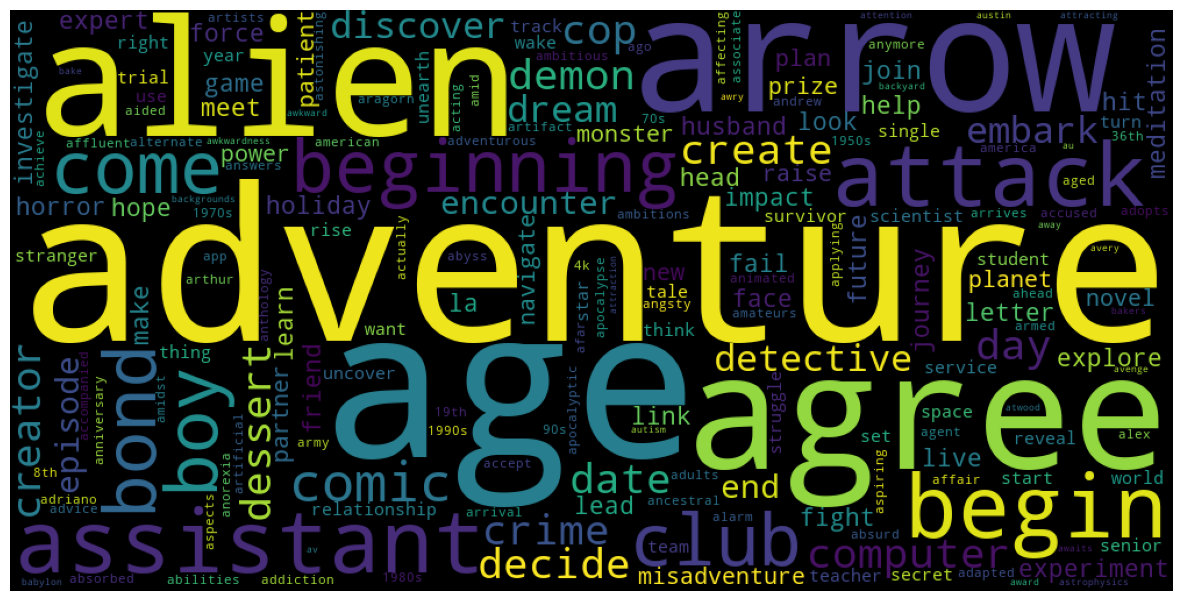

In [86]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

unique_string=(" ").join(feature_names)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

In [87]:
#Categories in counting 
text2 = df1["Categories"].values.astype('U') #Taking the text from the df. We need to convert it to Unicode
vect2 = CountVectorizer(stop_words='english') #Create the CV object, with English stop words
vect2 = vect2.fit(text2) #We fit the model with the words from the description text
vect2

feature_names2 = vect2.get_feature_names()
print(f"There are {len(feature_names2)} words in the vocabulary. A selection: {feature_names2}")

There are 36 words in the vocabulary. A selection: ['action', 'adventure', 'anime', 'british', 'children', 'classic', 'comedies', 'comedy', 'crime', 'cult', 'documentaries', 'docuseries', 'dramas', 'family', 'fantasy', 'features', 'fi', 'horror', 'independent', 'international', 'kids', 'lgbtq', 'movies', 'mysteries', 'nature', 'reality', 'romantic', 'sci', 'science', 'series', 'shows', 'stand', 'talk', 'teen', 'thrillers', 'tv']


C:\Users\denis\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


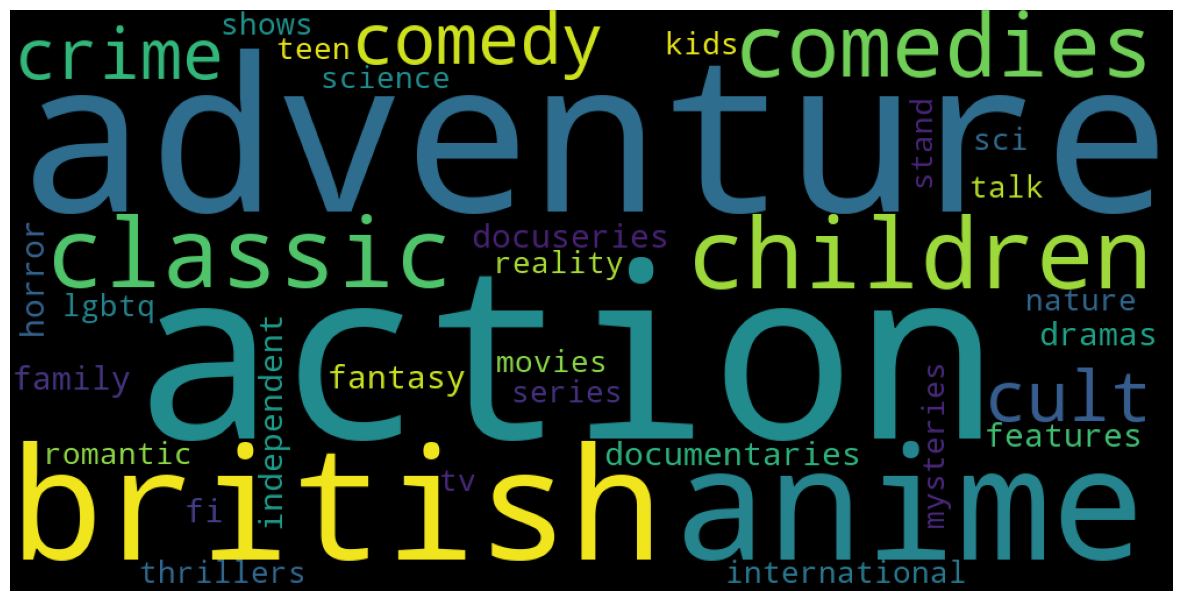

In [88]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

unique_string=(" ").join(feature_names2)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

## Predictive model: 
##### Training set/ Test set
I've made a training set out of the normal dataset to drop a big chunck of the data that had 'Denise' in the df1['Profile Name'] because the times that I trained the model with the full data set it would only predict "Denise" and almost never Rick. The reason for this is that the dataset consists of 137 rows that are connected to Denise and 42 rows connected to Rick. So to make it more even I dropped 93 rows that consisted of Denise to make the data more balanced.


In [89]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math 

In [90]:
#to train the model accurately the amount of data for both profiles should be equal (otherwise Denise is a lot more often in the data set which will skew things)
index = 0
to_remove = 93
for row in df1["Profile Name"]:
    if(to_remove <= 0):
        break
    if(row == "Denise"):
        df1 = df1.drop(index)
        to_remove = to_remove - 1;
    index += 1

In [125]:
#check if correclty gotten rid of the amount of 'Denise' found
description = df1["Description"]
profile = df1["Profile Name"]

profile.value_counts()

Rick      42
Denise    42
Name: Profile Name, dtype: int64

In [126]:
from sklearn.feature_extraction.text import CountVectorizer
#using a countvectorizer to count every word in description
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(description)
X_train_counts.shape

(84, 1023)

In [127]:
from sklearn.feature_extraction.text import TfidfTransformer
#training the model
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(84, 1023)

In [128]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(84, 1023)

In [129]:
from sklearn.model_selection import train_test_split
#splitting the model in training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, profile, test_size=0.3)

In [130]:
#Naive Bayes
nb = MultinomialNB() #create the model
nb = nb.fit(X_train, y_train) #fit the model X=features, y=character

#k-NN
knn = KNeighborsClassifier() #create the model
knn = knn.fit(X_train, y_train) #fit the model X=features, y=character

#Random Forest
rf = RandomForestClassifier() #create the model
rf = rf.fit(X_train, y_train) #fit the model X=features, y=character

In [131]:
nb_score = nb.score(X_test, y_test)
knn_score = knn.score(X_test, y_test)
rf_score = rf.score(X_test, y_test)

print(f"The accuracy for Naive Bayes: {nb_score}")
print(f"The accuracy for k-NN: {knn_score}")
print(f"The accuracy for Random Forest: {rf_score}")

The accuracy for Naive Bayes: 0.4230769230769231
The accuracy for k-NN: 0.4230769230769231
The accuracy for Random Forest: 0.4230769230769231


##### Train model (chosen model: k-nn, random forest, naive bayes)
The accuracy scores weren't different. The results made me choose Naive Bayes.

In [170]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB().fit(X_train, y_train)

In [171]:
for entry in df1["Description"]:
    docs_new = [entry]
    X_new_counts = count_vect.transform(docs_new)
    X_new_tfidf = tfidf_transformer.transform(X_new_counts)

    predicted = nb.predict(X_new_tfidf)

    for doc, category in zip(docs_new, predicted):
        print('%r => %s' % (doc, category))

'The arrival of a charismatic young priest brings glorious miracles, ominous mysteries and renewed religious fervor to a dying town desperate to believe.' => Rick
'In a futuristic society where an indestructible robot police force keeps crime at bay, a lone droid evolves to the next level of artificial intelligence.' => Rick
'Escaping from poverty to become a witcher, Vesemir slays monsters for coin and glory, but when a new menace rises, he must face the demons of his past.' => Rick
'Accompanied by a German bounty hunter, a freed slave named Django travels across America to free his wife from a sadistic plantation owner.' => Rick
"For the first time in 4K Ultra-HD, everyone's favorite Yuletide fireplace snaps and crackles in crystal clear, high-def holiday warmth." => Rick
'A new comedy special shot and performed by Bo Burnham, alone, over the course of the past year.' => Rick
'Terrifying creatures, wicked surprises and dark comedy converge in this NSFW anthology of animated stories p

In [173]:
#print score of the naive bayes once. 
score = nb.score(X_test, y_test)

print(score)

0.34615384615384615


In [174]:
#give new description from dataset (can be kaggle so a new one)
docs_new = ["Frodo and Sam head to Mordor to destroy the One Ring of Power while Gimli, Legolas and Aragorn search for the orc-captured Merry and Pippin."]
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = nb.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, category))

'Frodo and Sam head to Mordor to destroy the One Ring of Power while Gimli, Legolas and Aragorn search for the orc-captured Merry and Pippin.' => Rick


In [175]:
docs_new2 = ["When a down-to-earth Chicago baker and a soon-to-be princess discover they look like twins, they hatch a Christmastime plan to trade places"]
X_new_counts2 = count_vect.transform(docs_new2)
X_new_tfidf2 = tfidf_transformer.transform(X_new_counts2)

predicted = nb.predict(X_new_tfidf)

for doc, category in zip(docs_new2, predicted):
    print('%r => %s' % (doc, category))

'When a down-to-earth Chicago baker and a soon-to-be princess discover they look like twins, they hatch a Christmastime plan to trade places' => Rick


#### Predictions
To test the model a description that's already in the model was used to see what outcome it generates. "Frodo and Sam head to Mordor to destroy the One Ring of Power while Gimli, Legolas and Aragorn search for the orc-captured Merry and Pippin." is the description that is used. In this case it correctly generates the output Rick.

For a new description I chose: "When a down-to-earth Chicago baker and a soon-to-be princess discover they look like twins, they hatch a Christmastime plan to trade places.". This description is also classified for Rick, (which I don't think he will watch ;P)

In [176]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Denise       0.65      0.76      0.70        17
        Rick       0.33      0.22      0.27         9

    accuracy                           0.58        26
   macro avg       0.49      0.49      0.48        26
weighted avg       0.54      0.58      0.55        26



##### precision
Precision is the accuracy of the positive predictions. So the accuracy for positive predictions is higher for Rick in this instance. This means the model can predict Rick more correctly than Denise.

##### recall
The model found 92% postive cased for Denise and 38% for Rick.

##### f1 -score
This means what percentage of positive scores were correct. 73% for Denise and 53% for Rick.

##### support
The amount of actual occurences in the dataset. Eventhough the amount of Rick is higher in the dataset, it has a hard time to be precise in the Rick predictions.

### Re-training the model 
The accuracy of the model is flunctuation a lot. There fore I chose to retrain the model.

I chose to retrain the model on two columns instead of one to see if the model could become more accurate this way. The chosen column is df1["Categories"]. To add this column to the training data en test data I had to retrain en Vectorize this part of the dataset as well to make sure that they could be connected to eachother. The model got a accuracy of 42% with only Description. This means that the model will do a better job guessing one of the two than actually predicting the Profile.

In [222]:
import numpy as np
from numpy import mean, around
from sklearn.feature_extraction.text import CountVectorizer

#adding the df1["Catergories"] to a new Countvectorizer
count_vect_plus = CountVectorizer()
X_train_plus_counts = count_vect_plus.fit_transform(df1["Categories"])
X_train_plus_counts.shape

(84, 32)

In [223]:
#adding the new data column to the training set
tf_transformer_plus = TfidfTransformer(use_idf=False).fit(X_train_plus_counts)
X_train_plus_tf = tf_transformer_plus.transform(X_train_plus_counts)
X_train_plus_tf.shape

(84, 32)

In [224]:
tfidf_transformer_plus = TfidfTransformer()
X_train_tfidf_plus = tfidf_transformer_plus.fit_transform(X_train_plus_counts)
X_train_tfidf_plus.shape

(84, 32)

In [225]:
X_plus = np.c_[X_train_tfidf.toarray(), X_train_tfidf_plus.toarray()] #X.toarray() converts the sparse array to a normal array. 
X_train_plus, X_test_plus, y_train_plus, y_test_plus = train_test_split(X_plus, profile, test_size=0.3)

In [226]:
#use the new data = plus to fit to NB
nb_plus = MultinomialNB().fit(X_train_plus, y_train_plus)

score = nb_plus.score(X_test_plus, y_test_plus)

print(score)

0.46153846153846156


In [227]:
nb1_score = [] #the original data
nb2_score = [] #the original data with extra length column

highest_score = 0
highest_score_plus = 0
best_model = 0
best_model_plus = 0

for i in range(0,10000):
    X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, profile, test_size=0.3)
    X_train_plus, X_test_plus, y_train_plus, y_test_plus = train_test_split(X_plus, profile, test_size=0.3)
    
    #the old model and scores with only description
    nb1 = MultinomialNB() #create the model
    nb1 = nb1.fit(X_train, y_train) #train with original data
    local_nb1_score = nb1.score(X_test, y_test)
    
    if(local_nb1_score > highest_score):
        best_model = nb1
        highest_score = local_nb1_score
    
    nb1_score.append(local_nb1_score) #calculate scores and add to list
    
    #the new model and scores with description and categories
    nb2 = MultinomialNB() #create the model
    nb2 = nb2.fit(X_train_plus, y_train_plus) #train with original data + categories column
    local_nb2_score = nb2.score(X_test_plus, y_test_plus)
    
    if(local_nb2_score > highest_score_plus):
        best_model_plus = nb2
        highest_score_plus = local_nb2_score
    
    nb2_score.append(local_nb2_score) #calculate scores and add to list

In [228]:
from numpy import mean, around

print("Ran the model 1000 times")
print(f"The mean score of the model: {round(mean(nb1_score),3)} based on description only ")
print(f"The mean score of the model: {round(mean(nb2_score),3)} based on description & category")      

Ran the model 1000 times
The mean score of the model: 0.479 based on description only 
The mean score of the model: 0.629 based on description & category


## Evaluation: 

In [229]:
from sklearn.metrics import confusion_matrix

y_pred_plus = nb2.predict(X_test_plus)
cm1 = confusion_matrix(y_test_plus, y_pred_plus) #creates a "confusion matrix"
cm1 = pd.DataFrame(cm1, index=['Rick', 'Denise'], columns = ['Rick (pred)', 'Denise (pred)']) #using the correct labels to show the confusion matrix
cm1

,Rick (pred),Denise (pred)
Rick,8,4
Denise,5,9


In [230]:
from sklearn.metrics import classification_report
print(classification_report(y_test_plus, y_pred_plus))

              precision    recall  f1-score   support

      Denise       0.62      0.67      0.64        12
        Rick       0.69      0.64      0.67        14

    accuracy                           0.65        26
   macro avg       0.65      0.65      0.65        26
weighted avg       0.66      0.65      0.65        26



##### precision
So the accuracy for positive predictions got a lot higher for Rick. It went from 33% to 69%. The precision score for Denise went up went down a little bit 3%. This made the model more balanced. The model can now predict Denise equally as much as Rick. The model is not perfect yet. Just like we can see in the confusion matrix one column above.

##### recall
The model improved a lot on recall for Rick. I higher recall score means a lower amount of false negatives.

##### f1 -score
The f1 score for Denise went down a little but the f1 score for Rick got a lot higher. f1 score is the mean of the recall and precision. 

##### support
The amount of actual occurences in the dataset. 

## Conclusion
It is possible to predict who will watch a tv show or movie based on a description. When the model was asked to predict if Denise or Rick will watch the Lord of the Rings description (Movie), Rick was correctly predicted. The accuracy was 42%, because of the low accuracy the model doesn't have a lot of value. For almost every prediction it did Rick came out.

It still had a lot of problems predicting correctly. To add more value to the model it was also trained with the Categories. This made the accuracy of the model 15% higher on average. The model went from 48% to 63% accuracy which is a significant change. 

Looking at the results 2 conclusions could be made about the training of the model.

1. To accurately use netflix descriptions as an indicator for which profile will watch the movie/tv show a lot more data is needed. The data should also be more balanced to do correct predictions. My dataset had a lot more information on Profile Name Denise compared to Profile Name Rick. It would also be interesting if the model would be as accurate if the account had more profiles than just 2 options. 

2. The accuracy of the models are all very low. The model has a hard time with correctly classifying the correct Profile Name depending on what information is there. To do predictions only based on description might not be the best option. To make the model more accurate it's best to also use the categories that are connected to the Kaggle dataset. 

##### Discussion
To use this model for actual predictions a lot of test have to be run to make sure that the accuracy will be higher. Eventhough going form 48% to 63% is a lot, a lot could still be done. Further research should be done to see what columns could be added to make the accuracy better.

## References (optional): 
any literature referenced in APA style. Code snippets need not be referenced, but see Use of sources and plagiarism below.

1. Working With Text Data. (n.d.). Scikit-learn. https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

2. Jupiter Notebook - text mining from the FML classes.

3. Jupiter Notebook - Simpsons from the FML classes.

